# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Import dataset

In [ ]:
df = pd.read_csv('/content/Ecommerce_Delivery_Analytics_New.csv')
df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


# Mengecek jumlah missing value

In [ ]:
print("Missing value per kolom :")
print(df.isnull().sum())

Missing value per kolom :
Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64


# Melihat jumlah nilai unik di setiap

In [ ]:
print("Jumlah nilai unik di setiap kolom:")
print(df.nunique())

Jumlah nilai unik di setiap kolom:
Order ID                   100000
Customer ID                  9000
Platform                        3
Order Date & Time              60
Delivery Time (Minutes)        69
Product Category                6
Order Value (INR)            1951
Customer Feedback              13
Service Rating                  5
Delivery Delay                  2
Refund Requested                2
dtype: int64


# Statistik deskriptif untuk kolom kategorikal

In [ ]:
print("Statistik deskriptif untuk kolom kategorikal:")
print(df.describe(include = 'object'))

Statistik deskriptif untuk kolom kategorikal:
         Order ID Customer ID          Platform Order Date & Time  \
count      100000      100000            100000            100000   
unique     100000        9000                 3                60   
top     ORD099984    CUST8779  Swiggy Instamart           50:29.5   
freq            1          26             33449              1755   

       Product Category         Customer Feedback Delivery Delay  \
count            100000                    100000         100000   
unique                6                        13              2   
top               Dairy  Easy to order, loved it!             No   
freq              16857                      7791          86328   

       Refund Requested  
count            100000  
unique                2  
top                  No  
freq              54181  


# Berdasarkan pengecekan pada missing value tidak di dapatkan nilai yang missing, maka proses selanjutnya yaitu melakukan eksplorasi kolom yang di analisis

## Visualisasi distribusi Order Value

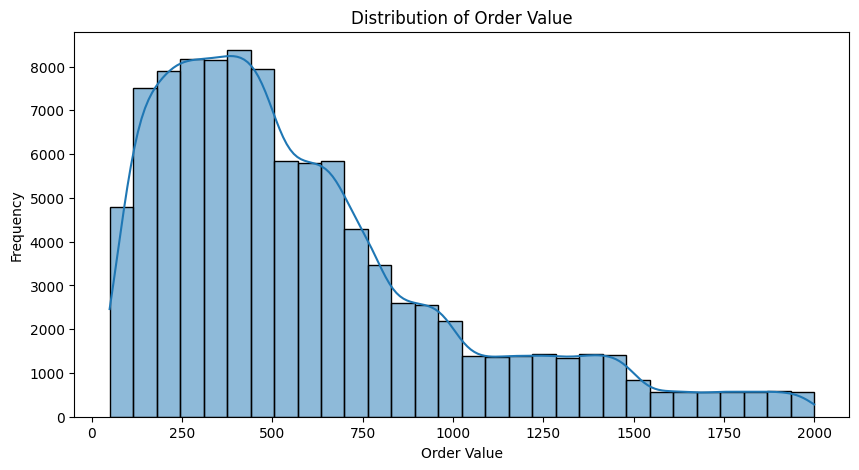

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Order Value (INR)'], bins=30, kde=True)
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Value')
plt.show()

## Menghitung jumlah pesanan per platform

In [ ]:
platform_counts = df['Platform'].value_counts()
platform_counts

,count
Platform,
Swiggy Instamart,33449
Blinkit,33424
JioMart,33127


## Visualisasi jumlah pesanan per platform

<ipython-input-58-5ff3391bac56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=platform_counts.index, y=platform_counts.values, palette = "rocket")


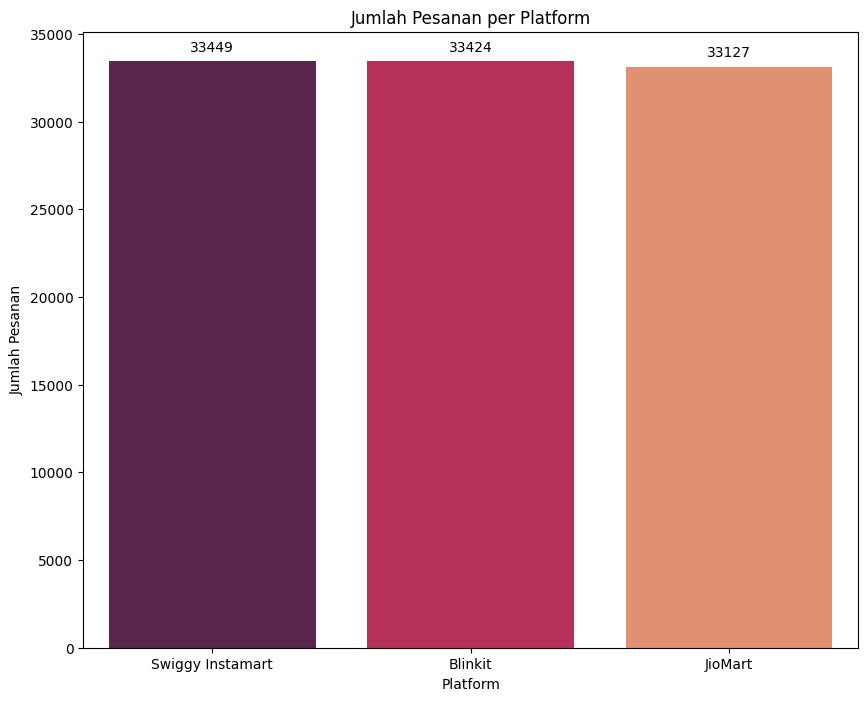

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=platform_counts.index, y=platform_counts.values, palette = "rocket")
plt.xlabel("Platform")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan per Platform")

# Menambahkan label angka diatas setiap bar
for p in ax.patches :
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color = 'black')

plt.show()

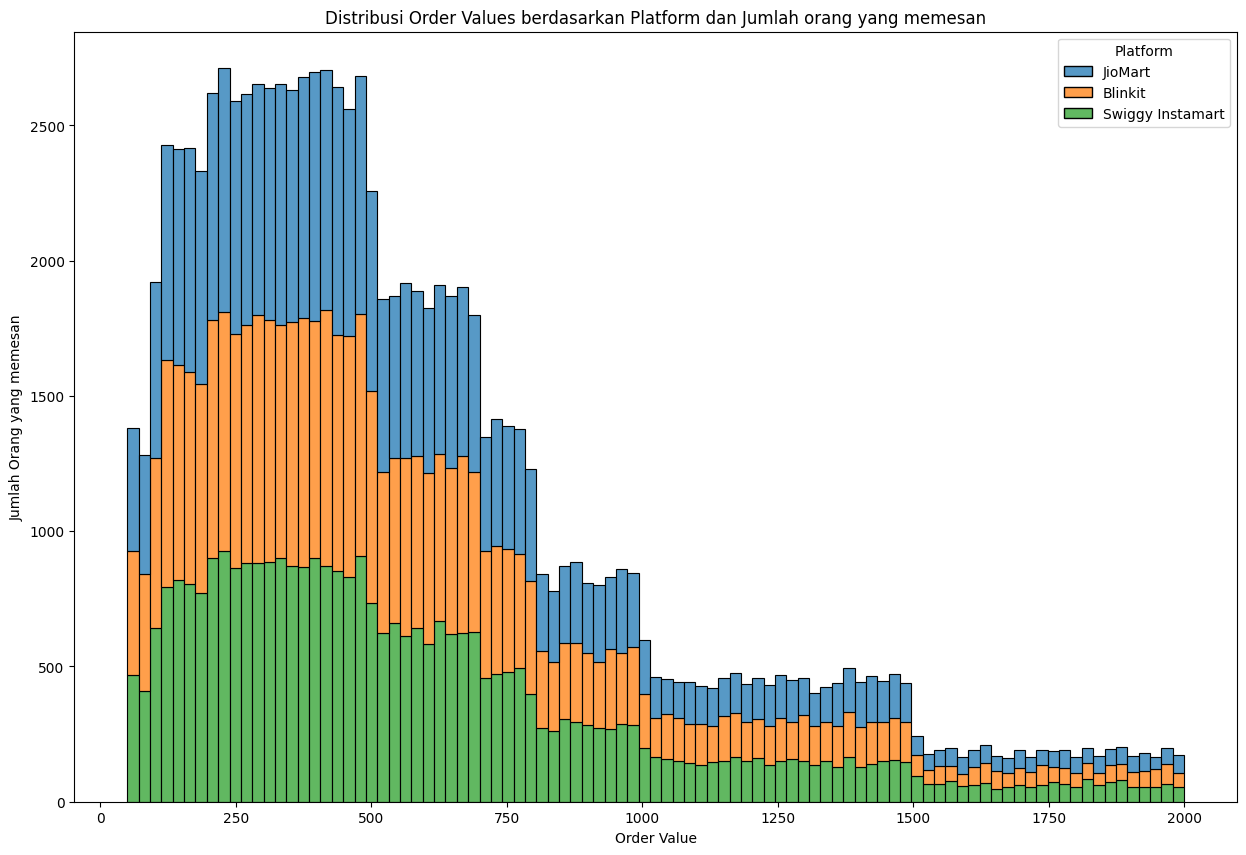

In [ ]:
plt.figure(figsize=(15, 10))

sns.histplot(data=df, x="Order Value (INR)", hue="Platform", multiple="stack")
plt.title("Distribusi Order Values berdasarkan Platform dan Jumlah orang yang memesan")
plt.xlabel("Order Value")
plt.ylabel("Jumlah Orang yang memesan")
plt.show()

In [ ]:
platform_order_counts = df.groupby(['Platform', 'Order Value (INR)']).size().reset_index(name='Jumlah Orang')
print(platform_order_counts)

              Platform  Order Value (INR)  Jumlah Orang
0              Blinkit                 50            30
1              Blinkit                 51            21
2              Blinkit                 52            15
3              Blinkit                 53            25
4              Blinkit                 54            21
...                ...                ...           ...
5742  Swiggy Instamart               1995             1
5743  Swiggy Instamart               1996             3
5744  Swiggy Instamart               1998             2
5745  Swiggy Instamart               1999             3
5746  Swiggy Instamart               2000             3

[5747 rows x 3 columns]


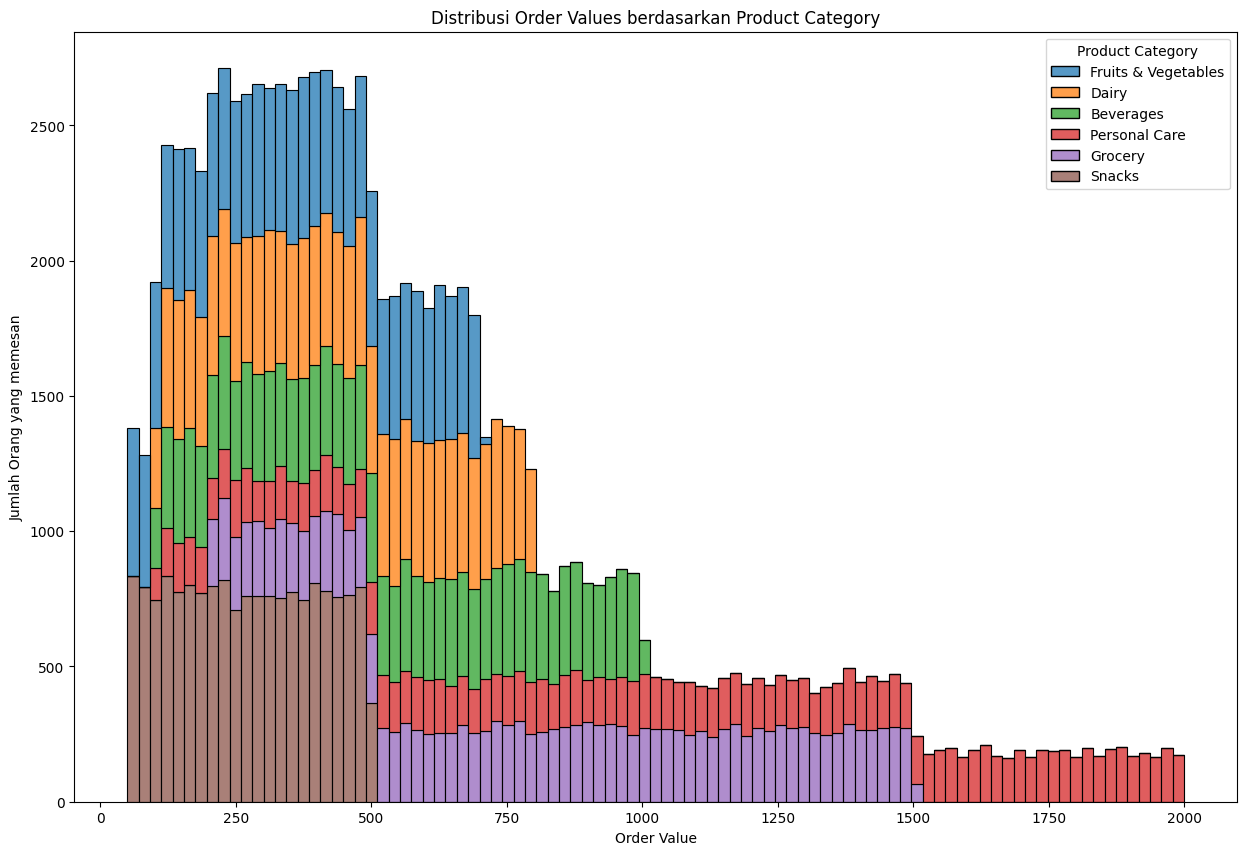

In [ ]:
plt.figure(figsize=(15, 10))

sns.histplot(data=df, x="Order Value (INR)", hue="Product Category", multiple="stack")
plt.title("Distribusi Order Values berdasarkan Product Category")
plt.xlabel("Order Value")
plt.ylabel("Jumlah Orang yang memesan")
plt.show()

In [ ]:
category_order_counts = df.groupby(['Product Category', 'Order Value (INR)']).size().reset_index(name='Jumlah Orang')
print(category_order_counts)

     Product Category  Order Value (INR)  Jumlah Orang
0           Beverages                100            13
1           Beverages                101            18
2           Beverages                102            14
3           Beverages                103            15
4           Beverages                104            15
...               ...                ...           ...
5901           Snacks                496            39
5902           Snacks                497            28
5903           Snacks                498            46
5904           Snacks                499            33
5905           Snacks                500            32

[5906 rows x 3 columns]


<ipython-input-63-79a63b07253b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Platform", y="Order Value (INR)", palette="Set3")


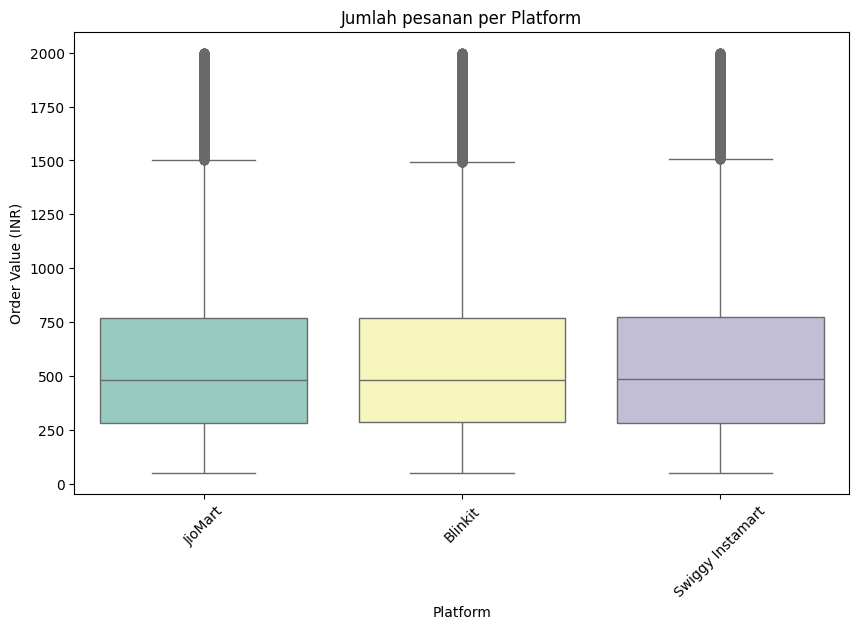

In [ ]:
plt.figure(figsize=(10, 6))
# Replace 'df_selected' with 'df' if you intend to use the original DataFrame
# The `x` and `y` arguments should be column names within the DataFrame 'df'.
sns.boxplot(data=df, x="Platform", y="Order Value (INR)", palette="Set3")
plt.title("Jumlah pesanan per Platform")
plt.xlabel("Platform")
plt.ylabel("Order Value (INR)")
plt.xticks(rotation=45)
plt.show()

## Rata-rata Order Value per Platform

In [ ]:
platform_order_value = df.groupby('Platform')['Order Value (INR)'].mean().sort_values(ascending=False)
platform_order_value

,Order Value (INR)
Platform,
Swiggy Instamart,592.902150
JioMart,590.526519
Blinkit,589.548947


## Visualisasi rata-rata Order Values per Platform

Visualisasi bar plot akan menunjukkan platform mana yang memiliki rata-rata order value tertinggi dan terendah. Platform dengan bar yang lebih tinggi menunjukkan rata-rata order value yang lebih tinggi.

Anda dapat membandingkan rata-rata order value antar platform untuk mendapatkan insight, misalnya:

- Platform mana yang menghasilkan order value tertinggi?
Platform mana yang menghasilkan order value terendah?
Apakah ada perbedaan signifikan antara rata-rata order value antar platform?
Kesimpulan

- Visualisasi rata-rata order value per platform memberikan informasi penting tentang performa setiap platform dalam menghasilkan pendapatan. Dengan memahami informasi ini, Anda dapat membuat keputusan yang lebih baik dalam strategi bisnis, misalnya dengan mengalokasikan lebih banyak sumber daya ke platform yang menghasilkan order value tertinggi.

<ipython-input-65-d60cddc732cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=platform_order_value.index, y=platform_order_value.values, palette = "rocket")


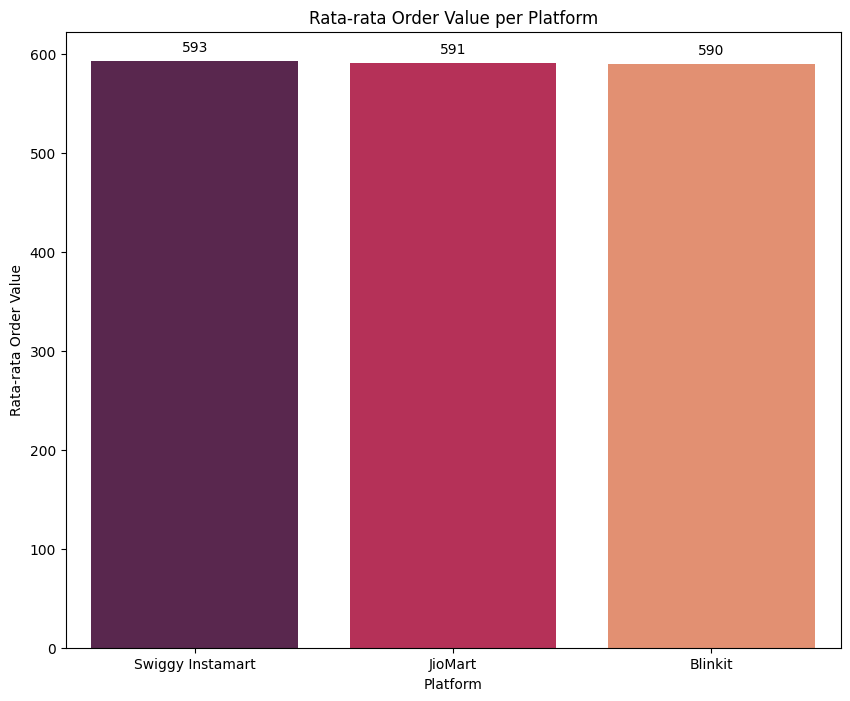

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=platform_order_value.index, y=platform_order_value.values, palette = "rocket")
plt.xlabel("Platform")
plt.ylabel("Rata-rata Order Value")
plt.title("Rata-rata Order Value per Platform")
# Menambahkan label angka diatas setiap bar
for p in ax.patches :
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color = 'black')

plt.show()

## Analisis kategori Product

<ipython-input-66-c3581c624158>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Product Category"], order=df['Product Category'].value_counts().index, palette = "rocket")


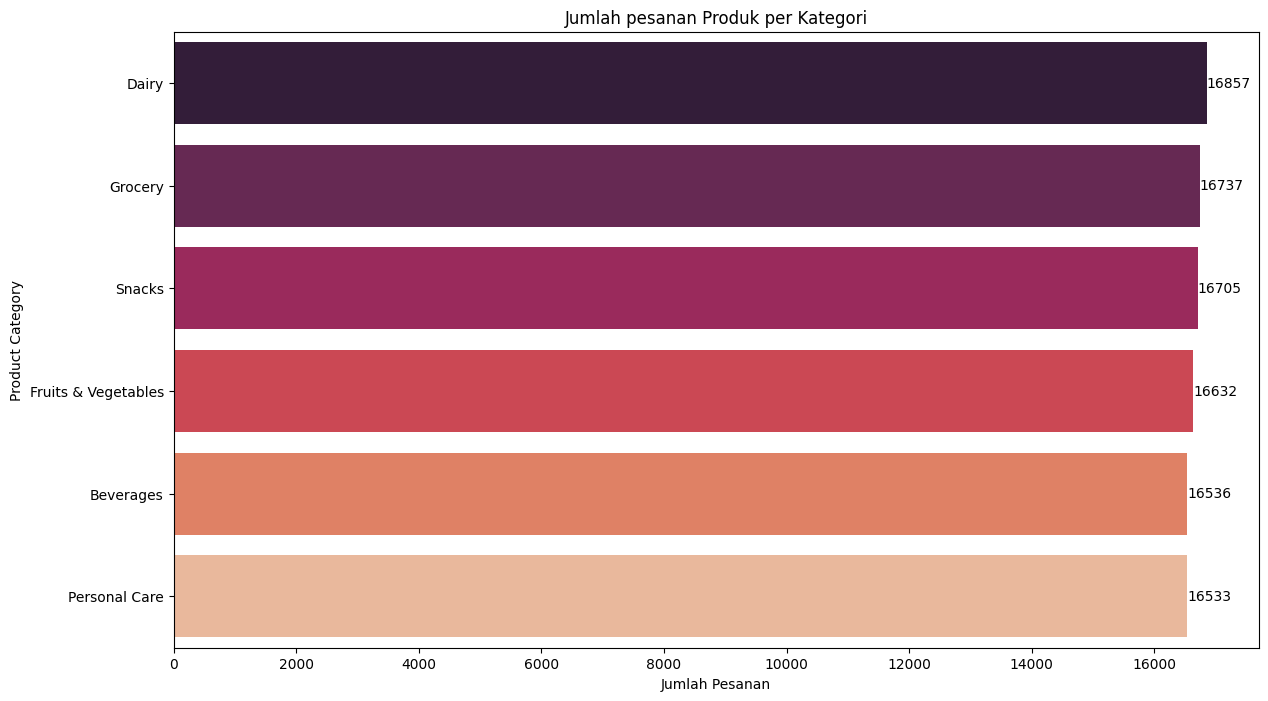

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y=df["Product Category"], order=df['Product Category'].value_counts().index, palette = "rocket")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Product Category")
plt.title("Jumlah pesanan Produk per Kategori")

for p in ax.patches:
    width = p.get_width()    # Mendapatkan lebar bar
    ax.text(width + 1,       # Menentukan posisi x teks (sedikit di sebelah kanan bar)
            p.get_y() + p.get_height() / 2, # Menentukan posisi y teks (di tengah bar)
            '{:1.0f}'.format(width), # Menampilkan nilai lebar bar (jumlah) # Changed lenght to width
            ha="left", va="center")  # Menentukan perataan teks

plt.show()

## Visualisasi Jumlah Produk per Kategori (Pie Chart)

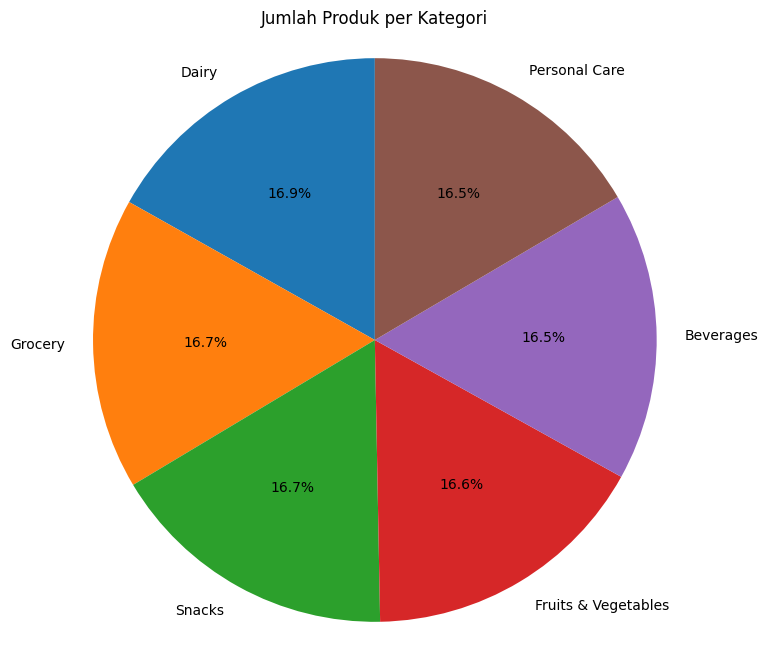

In [ ]:
plt.figure(figsize=(8, 8))

# Hitung jumlah produk per kategori
product_counts = df['Product Category'].value_counts()

# Buat pie chart
plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Jumlah Produk per Kategori")
plt.axis('equal')  # Agar pie chart berbentuk lingkaran sempurna

plt.show()

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Dairy,16857
Grocery,16737
Snacks,16705
Fruits & Vegetables,16632
Beverages,16536
Personal Care,16533


## Visualisasi Product terlaris di setiap Platform

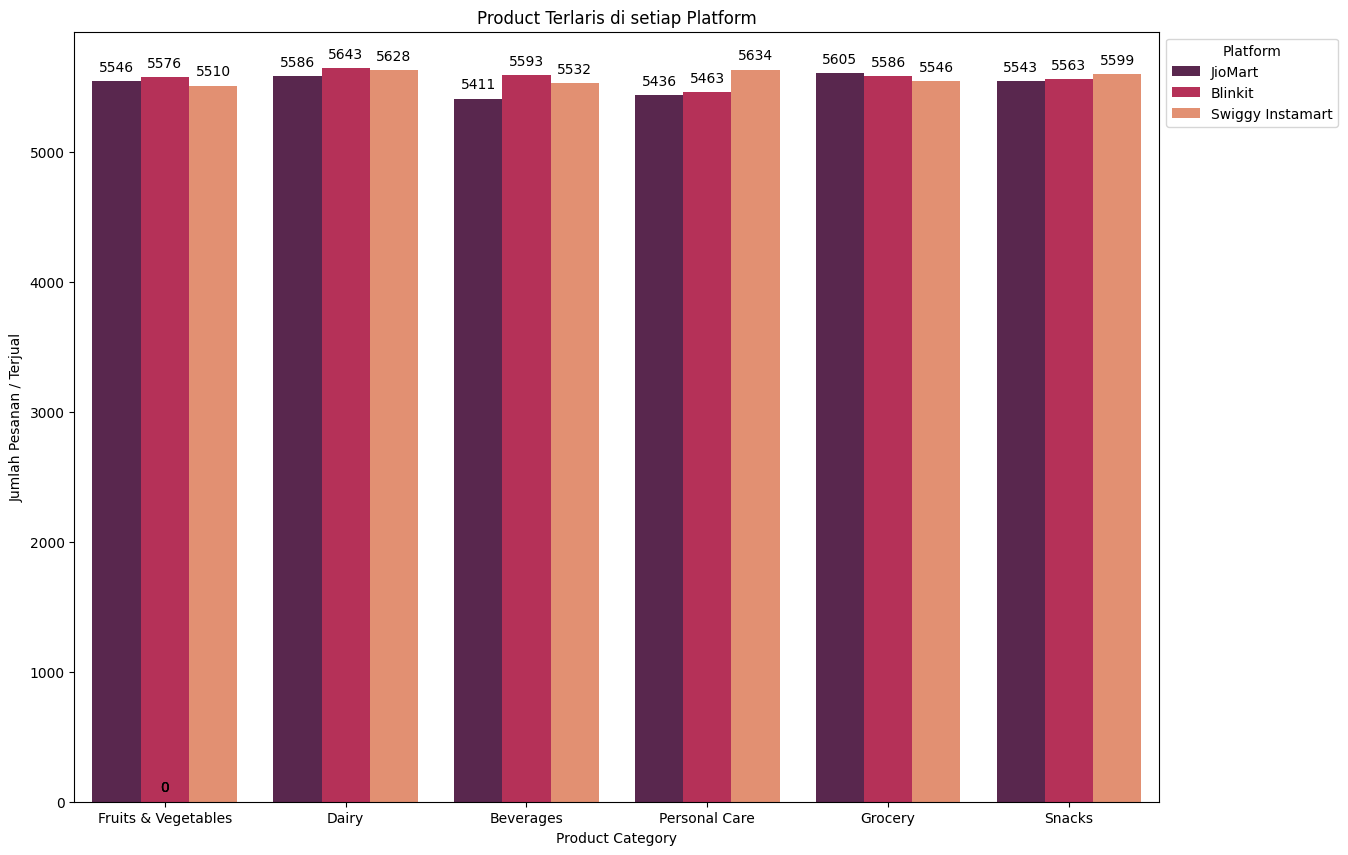

In [ ]:
plt.figure(figsize=(14,10))
ax = sns.countplot(x=df["Product Category"], hue=df["Platform"], palette = "rocket")
plt.title("Product Terlaris di setiap Platform")
plt.xlabel("Product Category")
plt.ylabel("Jumlah Pesanan / Terjual")
plt.legend(title="Platform")

# Memindahkan legend ke luar kotak visualisasi
plt.legend(title="Platform", bbox_to_anchor=(1, 1), loc='upper left')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), color='black', textcoords='offset points')

plt.show()

## Mengetahui jumlah seluruh pesanan / terjual per kategori produk berdasarkan platformnya

In [ ]:
order_counts = df.groupby(['Product Category', 'Platform']).size().reset_index(name='Jumlah Pesanan')
print(order_counts)

       Product Category          Platform  Jumlah Pesanan
0             Beverages           Blinkit            5593
1             Beverages           JioMart            5411
2             Beverages  Swiggy Instamart            5532
3                 Dairy           Blinkit            5643
4                 Dairy           JioMart            5586
5                 Dairy  Swiggy Instamart            5628
6   Fruits & Vegetables           Blinkit            5576
7   Fruits & Vegetables           JioMart            5546
8   Fruits & Vegetables  Swiggy Instamart            5510
9               Grocery           Blinkit            5586
10              Grocery           JioMart            5605
11              Grocery  Swiggy Instamart            5546
12        Personal Care           Blinkit            5463
13        Personal Care           JioMart            5436
14        Personal Care  Swiggy Instamart            5634
15               Snacks           Blinkit            5563
16            

## Mengetahui seluruh jumlah pesanan / terjual dari setiap kategori

In [ ]:
category_counts = df.groupby('Product Category').size().reset_index(name='Jumlah Produk')
print(category_counts)

      Product Category  Jumlah Produk
0            Beverages          16536
1                Dairy          16857
2  Fruits & Vegetables          16632
3              Grocery          16737
4        Personal Care          16533
5               Snacks          16705


## Analisis Sentimen Customer Feedback

In [ ]:
def get_sentiment(text):
  text = str(text)
  analysis = TextBlob(text) # Fixed indentation: aligned with previous line
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  else:
    return 'Negative'

df['Sentiment'] = df['Customer Feedback'].apply(get_sentiment)

## Visualisasi Customer Feedback berdasarkan Product Category

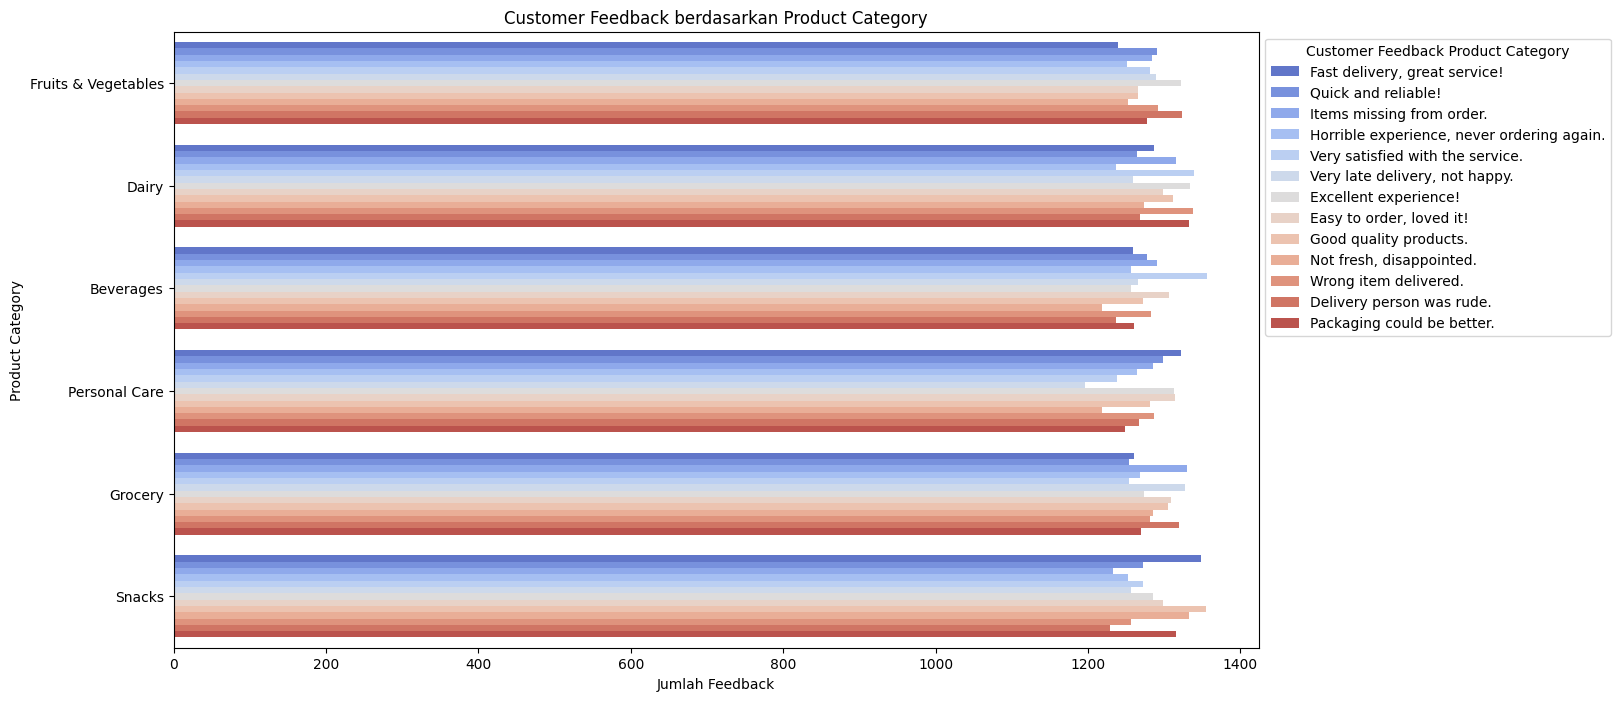

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y=df["Product Category"], hue=df["Customer Feedback"], palette='coolwarm')
plt.title("Customer Feedback berdasarkan Product Category")
plt.xlabel("Jumlah Feedback")
plt.ylabel("Product Category")

#Memindahkan legend ke luar kotak visualisasi
plt.legend(title="Customer Feedback Product Category", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

## Visualisasi Customer Feedback berdasarkan Platform

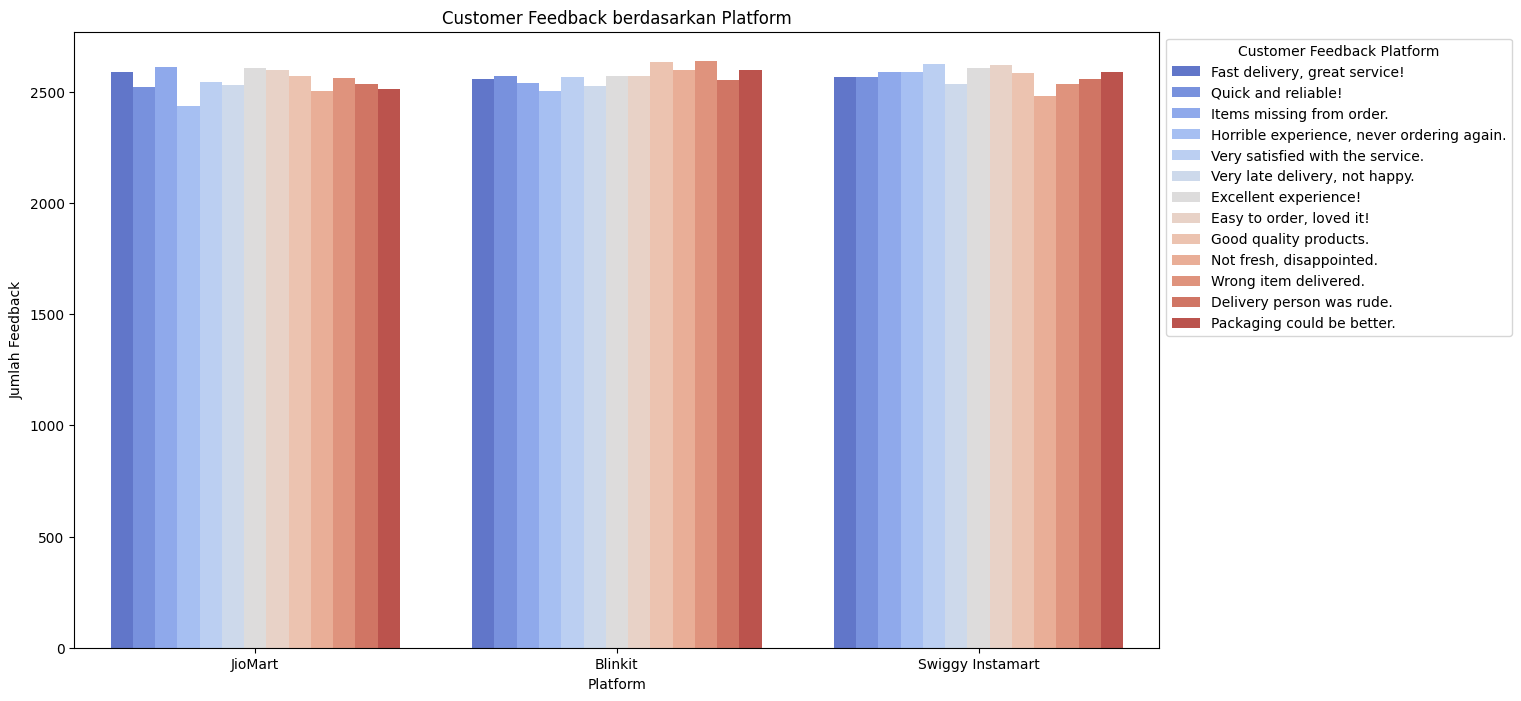

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df["Platform"], hue=df["Customer Feedback"], palette='coolwarm')
plt.title("Customer Feedback berdasarkan Platform")
plt.xlabel("Platform")
plt.ylabel("Jumlah Feedback")

#Memindahkan legend ke luar kotak visualisasi
plt.legend(title="Customer Feedback Platform", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

## Visualisasi sentimen feedback

<ipython-input-75-68946ee42575>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Sentiment"], palette = "coolwarm")


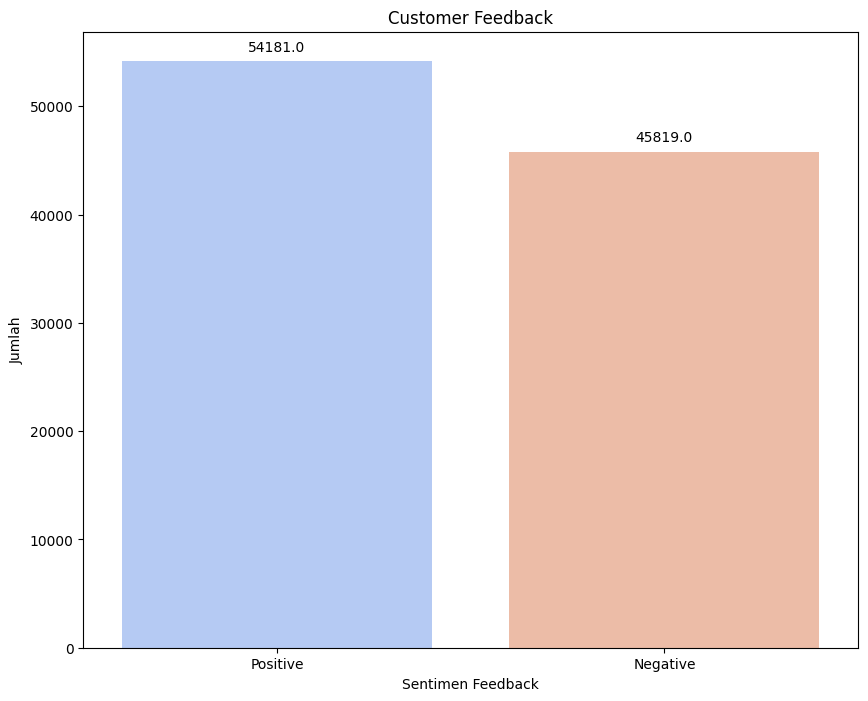

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
positive_count = sentiment_counts['Positive']
negative_count = sentiment_counts['Negative']

plt.figure(figsize=(10,8))
ax = sns.countplot(x=df["Sentiment"], palette = "coolwarm")
plt.xlabel("Sentimen Feedback")
plt.ylabel("Jumlah")
plt.title("Customer Feedback")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), color='black', textcoords='offset points')

plt.show()

## Visualisasi Service Rating

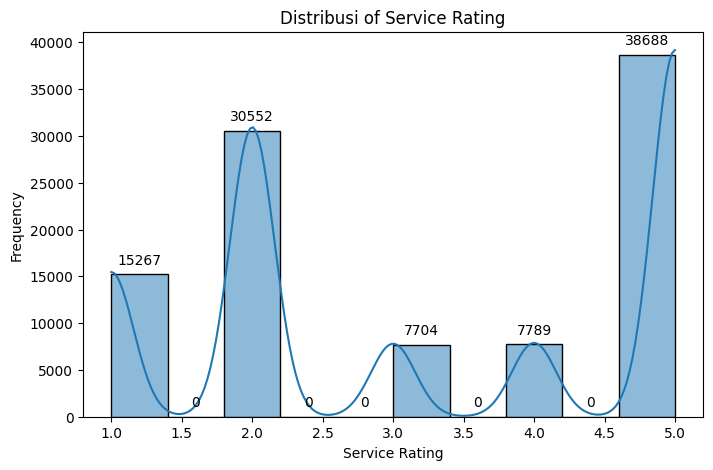

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['Service Rating'], bins=10, kde=True)
plt.xlabel('Service Rating')
plt.ylabel('Frequency')
plt.title('Distribusi of Service Rating')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), color='black', textcoords='offset points')

plt.show()

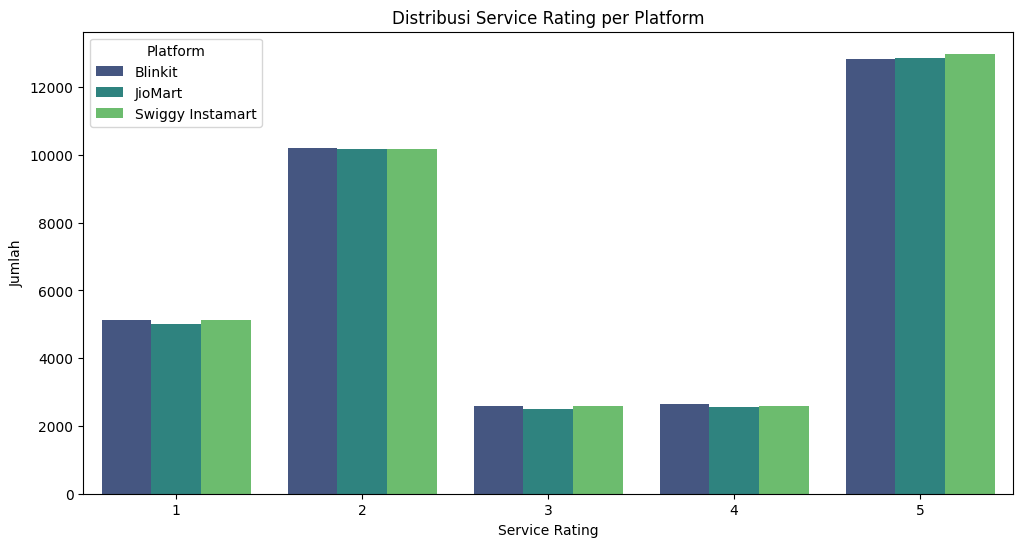

In [ ]:
rating_counts = df.groupby(['Platform', 'Service Rating']).size().reset_index(name='counts')

plt.figure(figsize=(12, 6))
sns.barplot(x='Service Rating', y='counts', hue='Platform', data=rating_counts, palette='viridis')
plt.title('Distribusi Service Rating per Platform')
plt.xlabel('Service Rating')
plt.ylabel('Jumlah')
plt.show()

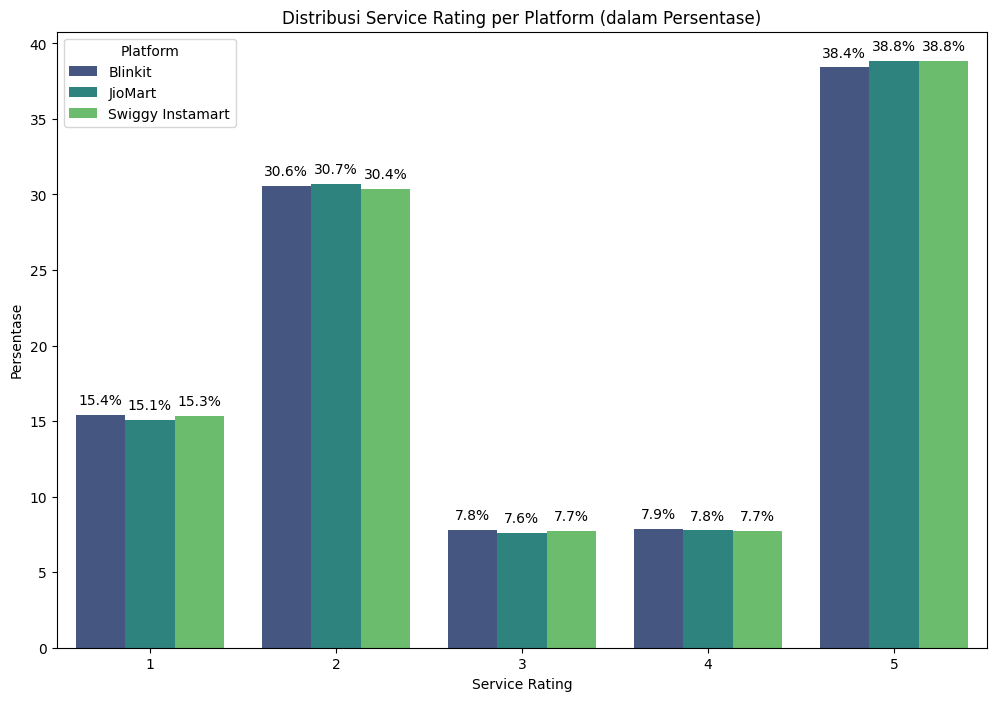

In [ ]:
# Hitung jumlah rating untuk setiap platform
rating_counts = df.groupby(['Platform', 'Service Rating']).size().reset_index(name='counts')

# Hitung total rating untuk setiap platform
platform_totals = rating_counts.groupby('Platform')['counts'].sum().reset_index()

# Gabungkan data total rating dengan data rating_counts
rating_counts = rating_counts.merge(platform_totals, on='Platform', how='left')

# Hitung persentase rating
rating_counts['percentage'] = (rating_counts['counts_x'] / rating_counts['counts_y']) * 100

# Buat bar plot dengan persentase
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service Rating', y='percentage', hue='Platform', data=rating_counts, palette='viridis')
plt.title('Distribusi Service Rating per Platform (dalam Persentase)')
plt.xlabel('Service Rating')
plt.ylabel('Persentase')

# Menambahkan label persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Tambahkan kondisi untuk mengecek nilai height
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format(height), ha="center", va="bottom")

plt.show()

## Visualisasi Service Rating berdasarkam Platform

<ipython-input-79-88746995f7f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Platform"], y=df["Service Rating"], palette="coolwarm")


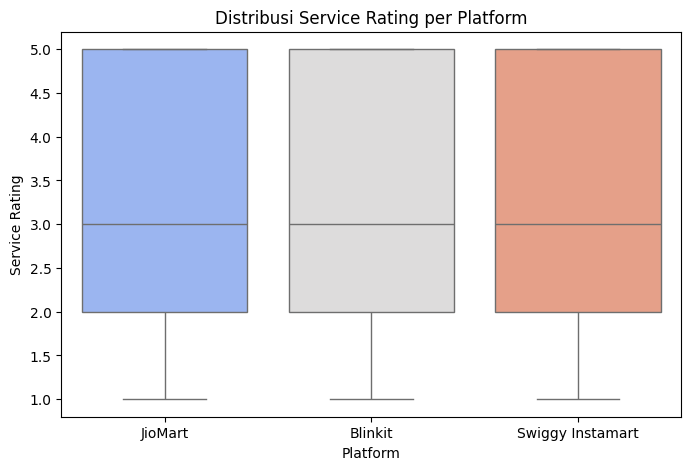

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Platform"], y=df["Service Rating"], palette="coolwarm")
plt.xlabel("Platform")
plt.ylabel("Service Rating")
plt.title("Distribusi Service Rating per Platform")

plt.show()

## Heatmap Korelasi Variabel Numerik

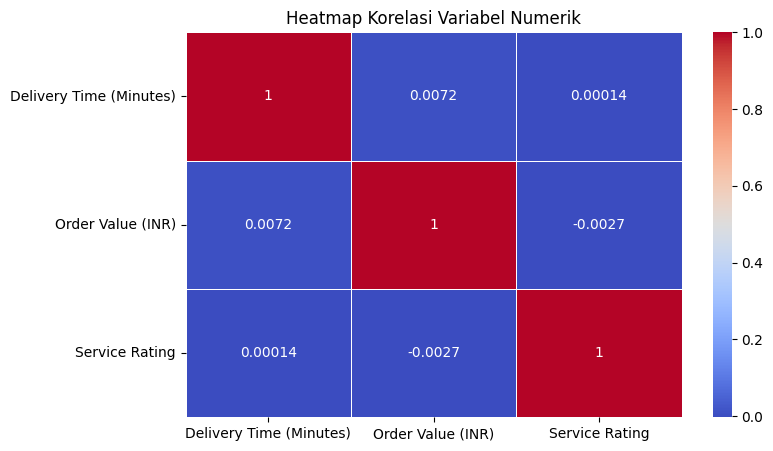

In [ ]:

plt.figure(figsize=(8,5))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

## Analisis Retensi Pelanggan

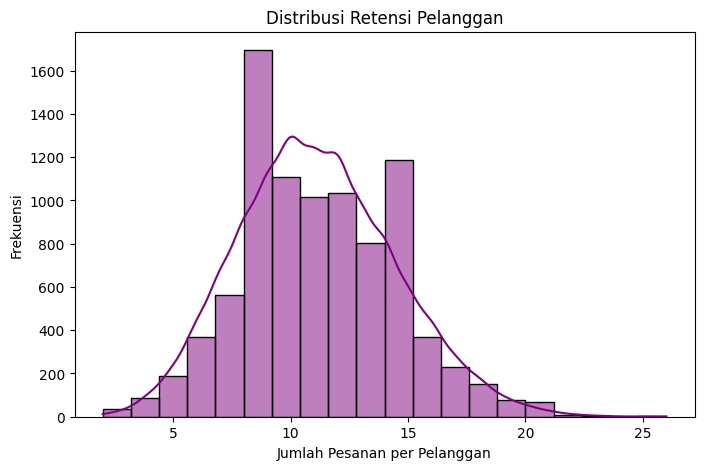

In [ ]:
if "Customer ID" in df.columns:
    customer_orders = df.groupby("Customer ID").size()
    plt.figure(figsize=(8,5))
    sns.histplot(customer_orders, bins=20, kde=True, color="purple")
    plt.xlabel("Jumlah Pesanan per Pelanggan")
    plt.ylabel("Frekuensi")
    plt.title("Distribusi Retensi Pelanggan")
    plt.show()

## Segmentasi Pelanggan berdasarkan Order Value

<ipython-input-82-fe39706db2b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Customer Segment'], palette='coolwarm')


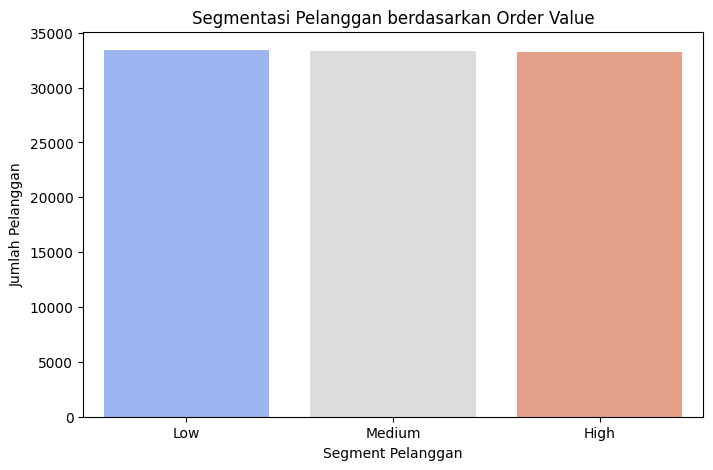

In [ ]:
df['Customer Segment'] = pd.qcut(df["Order Value (INR)"], q=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(8,5))
sns.countplot(x=df['Customer Segment'], palette='coolwarm')
plt.xlabel("Segment Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Segmentasi Pelanggan berdasarkan Order Value")
plt.show()

## Melihat TOP 5 Customer
 berdasarkan Jumlah Orderan dan Total Order Values nya, serta melihat Platform mana yang paling sering di gunakan oleh Customer tersebut

In [ ]:
customer_orders = df.groupby('Customer ID').agg(
    Jumlah_Order=('Order ID', 'count'),
    Total_Order_Value=('Order Value (INR)', 'sum'), # Menambahkan total Order Value
    Product_Category=('Product Category', lambda x: x.mode()[0] if not x.mode().empty else None), # Handle empty mode
    Platform=('Platform', lambda x: x.mode()[0] if not x.mode().empty else None) # Handle empty mode
).reset_index().sort_values(by=['Jumlah_Order'], ascending=False)

top_5_customers = customer_orders.head(5)

print("5 Customer dengan Order Terbanyak:")
for index, row in top_5_customers.iterrows():
    print(f"  Customer ID: {row['Customer ID']}, Jumlah Order: {row['Jumlah_Order']}, Total Order Value: {row['Total_Order_Value']}, Product Category terbanyak: {row['Product_Category']}, Platform terbanyak: {row['Platform']}")

5 Customer dengan Order Terbanyak:
  Customer ID: CUST8779, Jumlah Order: 26, Total Order Value: 14782, Product Category terbanyak: Fruits & Vegetables, Platform terbanyak: Blinkit
  Customer ID: CUST1848, Jumlah Order: 25, Total Order Value: 14457, Product Category terbanyak: Grocery, Platform terbanyak: Swiggy Instamart
  Customer ID: CUST8289, Jumlah Order: 24, Total Order Value: 13050, Product Category terbanyak: Dairy, Platform terbanyak: Blinkit
  Customer ID: CUST3001, Jumlah Order: 23, Total Order Value: 14506, Product Category terbanyak: Personal Care, Platform terbanyak: Blinkit
  Customer ID: CUST2633, Jumlah Order: 23, Total Order Value: 13000, Product Category terbanyak: Beverages, Platform terbanyak: Blinkit


## Deskripsi detail TOP 5 Customer

In [ ]:
customer_platform_details = df.groupby(['Customer ID', 'Platform']).agg(
    Jumlah_Order=('Order ID', 'count'),
    Total_Order_Value=('Order Value (INR)', 'sum')
).reset_index()

customer_total_orders = customer_platform_details.groupby('Customer ID')['Jumlah_Order'].sum().reset_index()
top_10_customers = customer_total_orders.sort_values(by=['Jumlah_Order'], ascending=False).head(5)['Customer ID'].tolist()

for customer_id in top_10_customers:
    customer_data = customer_platform_details[customer_platform_details['Customer ID'] == customer_id]

    # Mencari platform terbanyak
    platform_terbanyak = customer_data.loc[customer_data['Jumlah_Order'].idxmax(), 'Platform']
    jumlah_order_platform_terbanyak = customer_data.loc[customer_data['Jumlah_Order'].idxmax(), 'Jumlah_Order']
    total_order_value = customer_data['Total_Order_Value'].sum()

    print(f"Customer ID: {customer_id}")
    print(f"  Total Order: {customer_data['Jumlah_Order'].sum()}")
    print(f"  Total Order Value: {total_order_value}")
    print(f"  Platform Terbanyak: {platform_terbanyak} ({jumlah_order_platform_terbanyak} order)")

    # Menampilkan rincian platform lain
    for index, row in customer_data.iterrows():
        if row['Platform'] != platform_terbanyak:
            print(f"    - {row['Platform']}: {row['Jumlah_Order']} order")
    print("\n")

Customer ID: CUST8779
  Total Order: 26
  Total Order Value: 14782
  Platform Terbanyak: Blinkit (10 order)
    - JioMart: 8 order
    - Swiggy Instamart: 8 order


Customer ID: CUST1848
  Total Order: 25
  Total Order Value: 14457
  Platform Terbanyak: Swiggy Instamart (10 order)
    - Blinkit: 6 order
    - JioMart: 9 order


Customer ID: CUST8289
  Total Order: 24
  Total Order Value: 13050
  Platform Terbanyak: Blinkit (8 order)
    - JioMart: 8 order
    - Swiggy Instamart: 8 order


Customer ID: CUST3001
  Total Order: 23
  Total Order Value: 14506
  Platform Terbanyak: Blinkit (10 order)
    - JioMart: 7 order
    - Swiggy Instamart: 6 order


Customer ID: CUST2633
  Total Order: 23
  Total Order Value: 13000
  Platform Terbanyak: Blinkit (9 order)
    - JioMart: 7 order
    - Swiggy Instamart: 7 order




## Deskripsi Detail semua Customer

In [ ]:
customer_platform_details = df.groupby(['Customer ID', 'Platform']).agg(
    Jumlah_Order=('Order ID', 'count'),
    Total_Order_Value=('Order Value (INR)', 'sum')
).reset_index()

for customer_id in customer_platform_details['Customer ID'].unique():
    customer_data = customer_platform_details[customer_platform_details['Customer ID'] == customer_id]

    # Mencari platform terbanyak
    platform_terbanyak = customer_data.loc[customer_data['Jumlah_Order'].idxmax(), 'Platform']
    jumlah_order_platform_terbanyak = customer_data.loc[customer_data['Jumlah_Order'].idxmax(), 'Jumlah_Order']
    total_order_value = customer_data['Total_Order_Value'].sum()

    print(f"Customer ID: {customer_id}")
    print(f"  Total Order: {customer_data['Jumlah_Order'].sum()}")
    print(f"  Total Order Value: {total_order_value}")
    print(f"  Platform Terbanyak: {platform_terbanyak} ({jumlah_order_platform_terbanyak} order)")

    # Menampilkan rincian platform lain
    for index, row in customer_data.iterrows():
        if row['Platform'] != platform_terbanyak:
            print(f"    - {row['Platform']}: {row['Jumlah_Order']} order")
    print("\n")

Output streaming akan dipotong hingga 5000 baris terakhir.
Customer ID: CUST9370
  Total Order: 16
  Total Order Value: 13659
  Platform Terbanyak: Blinkit (7 order)
    - JioMart: 5 order
    - Swiggy Instamart: 4 order


Customer ID: CUST9371
  Total Order: 9
  Total Order Value: 6096
  Platform Terbanyak: JioMart (7 order)
    - Blinkit: 1 order
    - Swiggy Instamart: 1 order


Customer ID: CUST9372
  Total Order: 14
  Total Order Value: 10449
  Platform Terbanyak: JioMart (5 order)
    - Blinkit: 4 order
    - Swiggy Instamart: 5 order


Customer ID: CUST9373
  Total Order: 7
  Total Order Value: 5886
  Platform Terbanyak: JioMart (4 order)
    - Blinkit: 2 order
    - Swiggy Instamart: 1 order


Customer ID: CUST9374
  Total Order: 16
  Total Order Value: 8258
  Platform Terbanyak: Blinkit (7 order)
    - JioMart: 3 order
    - Swiggy Instamart: 6 order


Customer ID: CUST9375
  Total Order: 16
  Total Order Value: 10087
  Platform Terbanyak: JioMart (6 order)
    - Blinkit: 5 or